## Labor productivity

#### Cleaning the Data

In [1]:
## Import neccesary libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data-pUHnK.csv')

In [3]:
df.head()

,Group,Country,GDP per hour worked (GDP constant 2017 international $ at PPP)
0,Low income countries,Afghanistan,4.1
1,Lower-middle income countries,Angola,7.8
2,Upper-middle income countries,Albania,15.3
3,High income countries,United Arab Emirates,36.9
4,Upper-middle income countries,Argentina,29.8


In [4]:
df = df.rename(columns={'GDP per hour worked (GDP constant 2017 international $ at PPP)':'GDP_per_hour'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Group         185 non-null    object 
 1   Country       185 non-null    object 
 2   GDP_per_hour  185 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


In [6]:
df.shape

(185, 3)

#### Countries in the Dataset

In [7]:
mylist = list(set(df.Country))

mylist = sorted(mylist, reverse=False)

print(mylist)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Congo, Democratic Republic of the', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islam

#### GDP per hour according to income group

In [8]:
### Income grouping of countries in the data set

list(set(df.Group))

['Lower-middle income countries',
 'Low income countries',
 'High income countries',
 'Upper-middle income countries']

In [9]:
### Income classification of countries

UMI = df.groupby(['Group']).count()

UMI = UMI.loc[:, UMI.columns != 'GDP per hour worked (GDP constant 2017 international $ at PPP)']

print(UMI)

                               Country  GDP_per_hour
Group                                               
High income countries               61            61
Low income countries                28            28
Lower-middle income countries       47            47
Upper-middle income countries       49            49


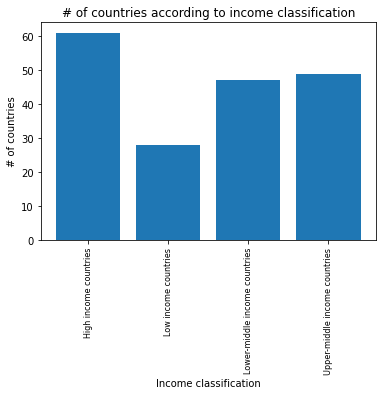

In [10]:
x = UMI.index
y = UMI.Country

plt.bar(x,y)
plt.title('# of countries according to income classification', size=12)
plt.xlabel('Income classification')
plt.ylabel('# of countries')
plt.xticks(rotation='vertical', size=8)
plt.show()

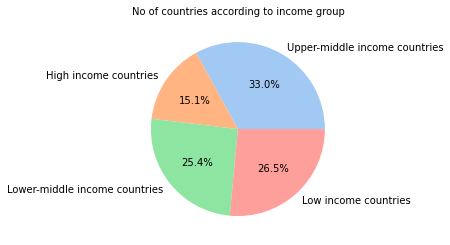

In [11]:
#define data

chart = UMI.Country
labels = ['Upper-middle income countries', 'High income countries','Lower-middle income countries','Low income countries']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(chart, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('No of countries according to income group', size=10)
plt.show()


#### Sort Countries by GDP per hour

In [12]:
df.head()

,Group,Country,GDP_per_hour
0,Low income countries,Afghanistan,4.1
1,Lower-middle income countries,Angola,7.8
2,Upper-middle income countries,Albania,15.3
3,High income countries,United Arab Emirates,36.9
4,Upper-middle income countries,Argentina,29.8


In [13]:
income_gdp = df.groupby(['Group']).mean()

In [14]:
income_gdp

,GDP_per_hour
Group,
High income countries,49.470492
Low income countries,3.067857
Lower-middle income countries,8.514894
Upper-middle income countries,18.993878


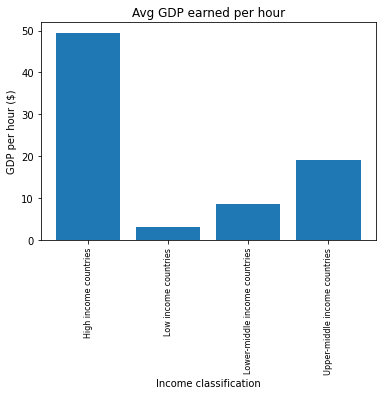

In [15]:
x = income_gdp.index
y = income_gdp.GDP_per_hour

plt.bar(x,y)
plt.title('Avg GDP earned per hour', size=12)
plt.xlabel('Income classification')
plt.ylabel('GDP per hour ($)')
plt.xticks(rotation='vertical', size=8)
plt.show()

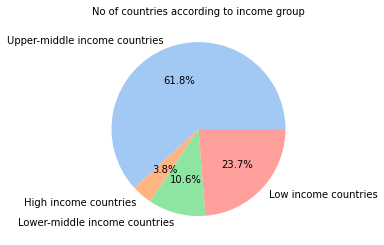

In [16]:
#define data

chart = income_gdp.GDP_per_hour
labels = ['Upper-middle income countries', 'High income countries','Lower-middle income countries','Low income countries']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(chart, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title('No of countries according to income group', size=10)
plt.show()

#### Countris & GDP per hour

In [17]:
### Countries with the highest GDP per hour

Top = df.nlargest(20, 'GDP_per_hour')
Top.head()

,Group,Country,GDP_per_hour
100,High income countries,Luxembourg,128.1
77,High income countries,Ireland,122.2
148,High income countries,Singapore,73.7
177,High income countries,United States,70.6
29,High income countries,Switzerland,69.7


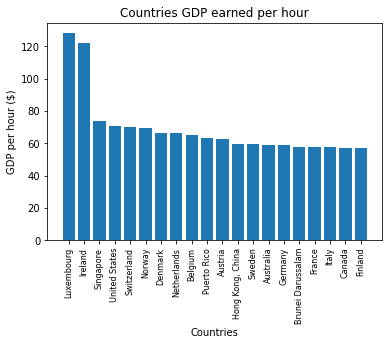

In [18]:
x = Top.Country
y = Top.GDP_per_hour
colors = sns.color_palette('pastel')[0:5]


plt.bar(x,y)
plt.title('Countries GDP earned per hour', size=12)
plt.xlabel('Countries')
plt.ylabel('GDP per hour ($)')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [19]:
### Countries with the lowest GDP per hour

Bottom = df.nsmallest(20, 'GDP_per_hour')
Bottom.head()

,Group,Country,GDP_per_hour
9,Low income countries,Burundi,0.8
26,Low income countries,Central African Republic,1.2
94,Low income countries,Liberia,1.4
121,Low income countries,Niger,1.7
136,Low income countries,"Korea, Democratic People's Republic of",1.8


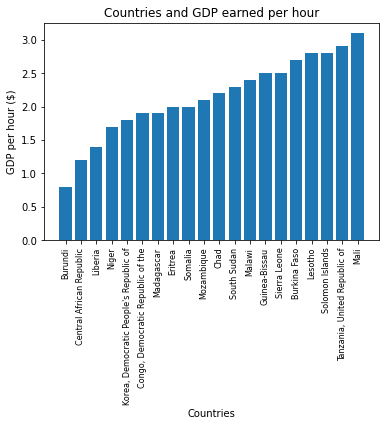

In [20]:
x = Bottom.Country
y = Bottom.GDP_per_hour

plt.bar(x,y)
plt.title('Countries and GDP earned per hour', size=12)
plt.xlabel('Countries')
plt.ylabel('GDP per hour ($)')
plt.xticks(rotation='vertical', size=8)
plt.show()

#### West African Countries & GDP per hour

In [21]:
Nigeria = df[df.Country == 'Nigeria']
Nigeria

,Group,Country,GDP_per_hour
122,Lower-middle income countries,Nigeria,8.1


In [22]:
Nigeria = df[df.Country == 'Nigeria']
Senegal = df[df.Country == 'Senegal']
Ghana = df[df.Country == 'Ghana']
Egypt = df[df.Country == 'Egypt']
SA = df[df.Country == 'Sierra Leone']
Togo = df[df.Country == 'Togo']
Tns = df[df.Country == 'Tunisia']
Ngr = df[df.Country == 'Niger']
Rwd = df[df.Country == 'Rwanda']

In [23]:
Nigeria

,Group,Country,GDP_per_hour
122,Lower-middle income countries,Nigeria,8.1


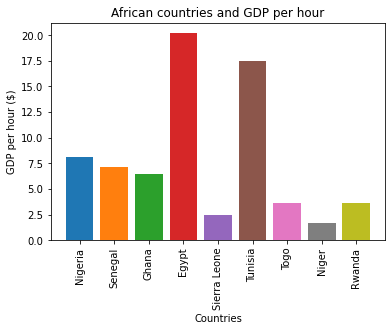

In [24]:
### plot some charts

plt.bar(Nigeria.Country, Nigeria.GDP_per_hour)
plt.bar(Senegal.Country, Senegal.GDP_per_hour)
plt.bar(Ghana.Country, Ghana.GDP_per_hour)
plt.bar(Egypt.Country, Egypt.GDP_per_hour)
plt.bar(SA.Country, SA.GDP_per_hour)
plt.bar(Tns.Country, Tns.GDP_per_hour)
plt.bar(Togo.Country, Togo.GDP_per_hour)
plt.bar(Ngr.Country, Ngr.GDP_per_hour)
plt.bar(Rwd.Country, Rwd.GDP_per_hour)

plt.title('African countries and GDP per hour', size=12)
plt.xlabel('Countries')
plt.ylabel('GDP per hour ($)')
plt.xticks(rotation='vertical')

plt.show()

In [25]:
df[df.Country == 'Nigeria']

,Group,Country,GDP_per_hour
122,Lower-middle income countries,Nigeria,8.1


In [26]:
df = pd.read_csv('data-pUHnK.csv')
df = df.rename(columns={'GDP per hour worked (GDP constant 2017 international $ at PPP)': 'GDP_per_hour'})
df.head()

,Group,Country,GDP_per_hour
0,Low income countries,Afghanistan,4.1
1,Lower-middle income countries,Angola,7.8
2,Upper-middle income countries,Albania,15.3
3,High income countries,United Arab Emirates,36.9
4,Upper-middle income countries,Argentina,29.8


In [27]:
# split column into multiple columns by delimiter 

income_category = df['Group'].str.split(' ', expand=True)
income_category = income_category[0]
income_category

0               Low
1      Lower-middle
2      Upper-middle
3              High
4      Upper-middle
           ...     
180    Upper-middle
181            High
182    Lower-middle
183    Lower-middle
184    Upper-middle
Name: 0, Length: 185, dtype: object

In [28]:
# export the data to excel

import csv

header = ['Country', 'GDP per hour worked (GDP constant 2017 international $ at PPP)']
    
data1 = [Nigeria.loc[:, Nigeria.columns!='Group']]
data2 = [Senegal.loc[:, Senegal.columns!='Group']]
data3 = [Ghana.loc[:, Ghana.columns!='Group']]
data4 = [Egypt.loc[:, Egypt.columns!='Group']]
data5 = [SA.loc[:, SA.columns!='Group']]
data6 = [Tns.loc[:, Tns.columns!='Group']]

with open('CountryGDP.csv', 'w', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data1)
        writer.writerow(data2)
        writer.writerow(data3)
        writer.writerow(data4)
        writer.writerow(data5)
        writer.writerow(data6)